<a href="https://colab.research.google.com/github/ykitaguchi77/GAN/blob/master/Few_shot_GAN_adaptation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Few shot GAN adaptation**

Implement: http://cedro3.com/ai/few-shot/ <br>
Original: https://github.com/utkarshojha/few-shot-gan-adaptation


#**Set up**

In [ ]:
# github からコードを取得
! git clone https://github.com/cedro3/few-shot-gan-adaptation.git
%cd few-shot-gan-adaptation
 
# ライブラリーのインストール
! pip install torch==1.7.0+cu101 torchvision==0.8.1+cu101 -f https://download.pytorch.org/whl/torch_stable.html
! pip install pytorch-fid==0.1.1
! pip install visdom==0.1.8.9
! pip install lpips==0.1.3
! pip install scipy==1.1.0
 
# ninja システムのインストール
! wget https://github.com/ninja-build/ninja/releases/download/v1.8.2/ninja-linux.zip
! sudo unzip ninja-linux.zip -d /usr/local/bin/
! sudo update-alternatives --install /usr/bin/ninja ninja /usr/local/bin/ninja 1 --force
 
# 学習済みパラメータのダウンロード
import gdown
gdown.download('https://drive.google.com/u/0/uc?id=1TQ_6x74RPQf03mSjtqUijM4MZEMyn7HI', 'source_ffhq.pt', quiet=False)
gdown.download('https://drive.google.com/u/0/uc?id=1aZjnGe2E6RCL7Y0Is9klzyYDl7nQzS7Z', 'ffhq_sketches.pt', quiet=False)
gdown.download('https://drive.google.com/u/0/uc?id=18OQmu0HYVr0gEF88BNMY6W519JiW0PZZ', 'ffhq_caricatures.pt', quiet=False)
 
# フォルダーの作成
import os
os.makedirs('traversals', exist_ok=True)

Cloning into 'few-shot-gan-adaptation'...
remote: Enumerating objects: 202, done.
remote: Counting objects: 100% (202/202), done.
remote: Compressing objects: 100% (169/169), done.
remote: Total 202 (delta 61), reused 136 (delta 31), pack-reused 0
Receiving objects: 100% (202/202), 97.85 MiB | 13.06 MiB/s, done.
Resolving deltas: 100% (61/61), done.
/content/few-shot-gan-adaptation
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |█████████████████████████▍      | 582.9 MB 1.4 MB/s eta 0:01:52

#**Make "Sketch" illustrations**

Traceback (most recent call last):
  File "generate_img.py", line 124, in <module>
    checkpoint = torch.load(args.ckpt_target)
  File "/usr/local/lib/python3.7/dist-packages/torch/serialization.py", line 581, in load
    with _open_file_like(f, 'rb') as opened_file:
  File "/usr/local/lib/python3.7/dist-packages/torch/serialization.py", line 230, in _open_file_like
    return _open_file(name_or_buffer, mode)
  File "/usr/local/lib/python3.7/dist-packages/torch/serialization.py", line 211, in __init__
    super(_open_file, self).__init__(open(name, mode))
FileNotFoundError: [Errno 2] No such file or directory: 'ffhq_sketches.pt'


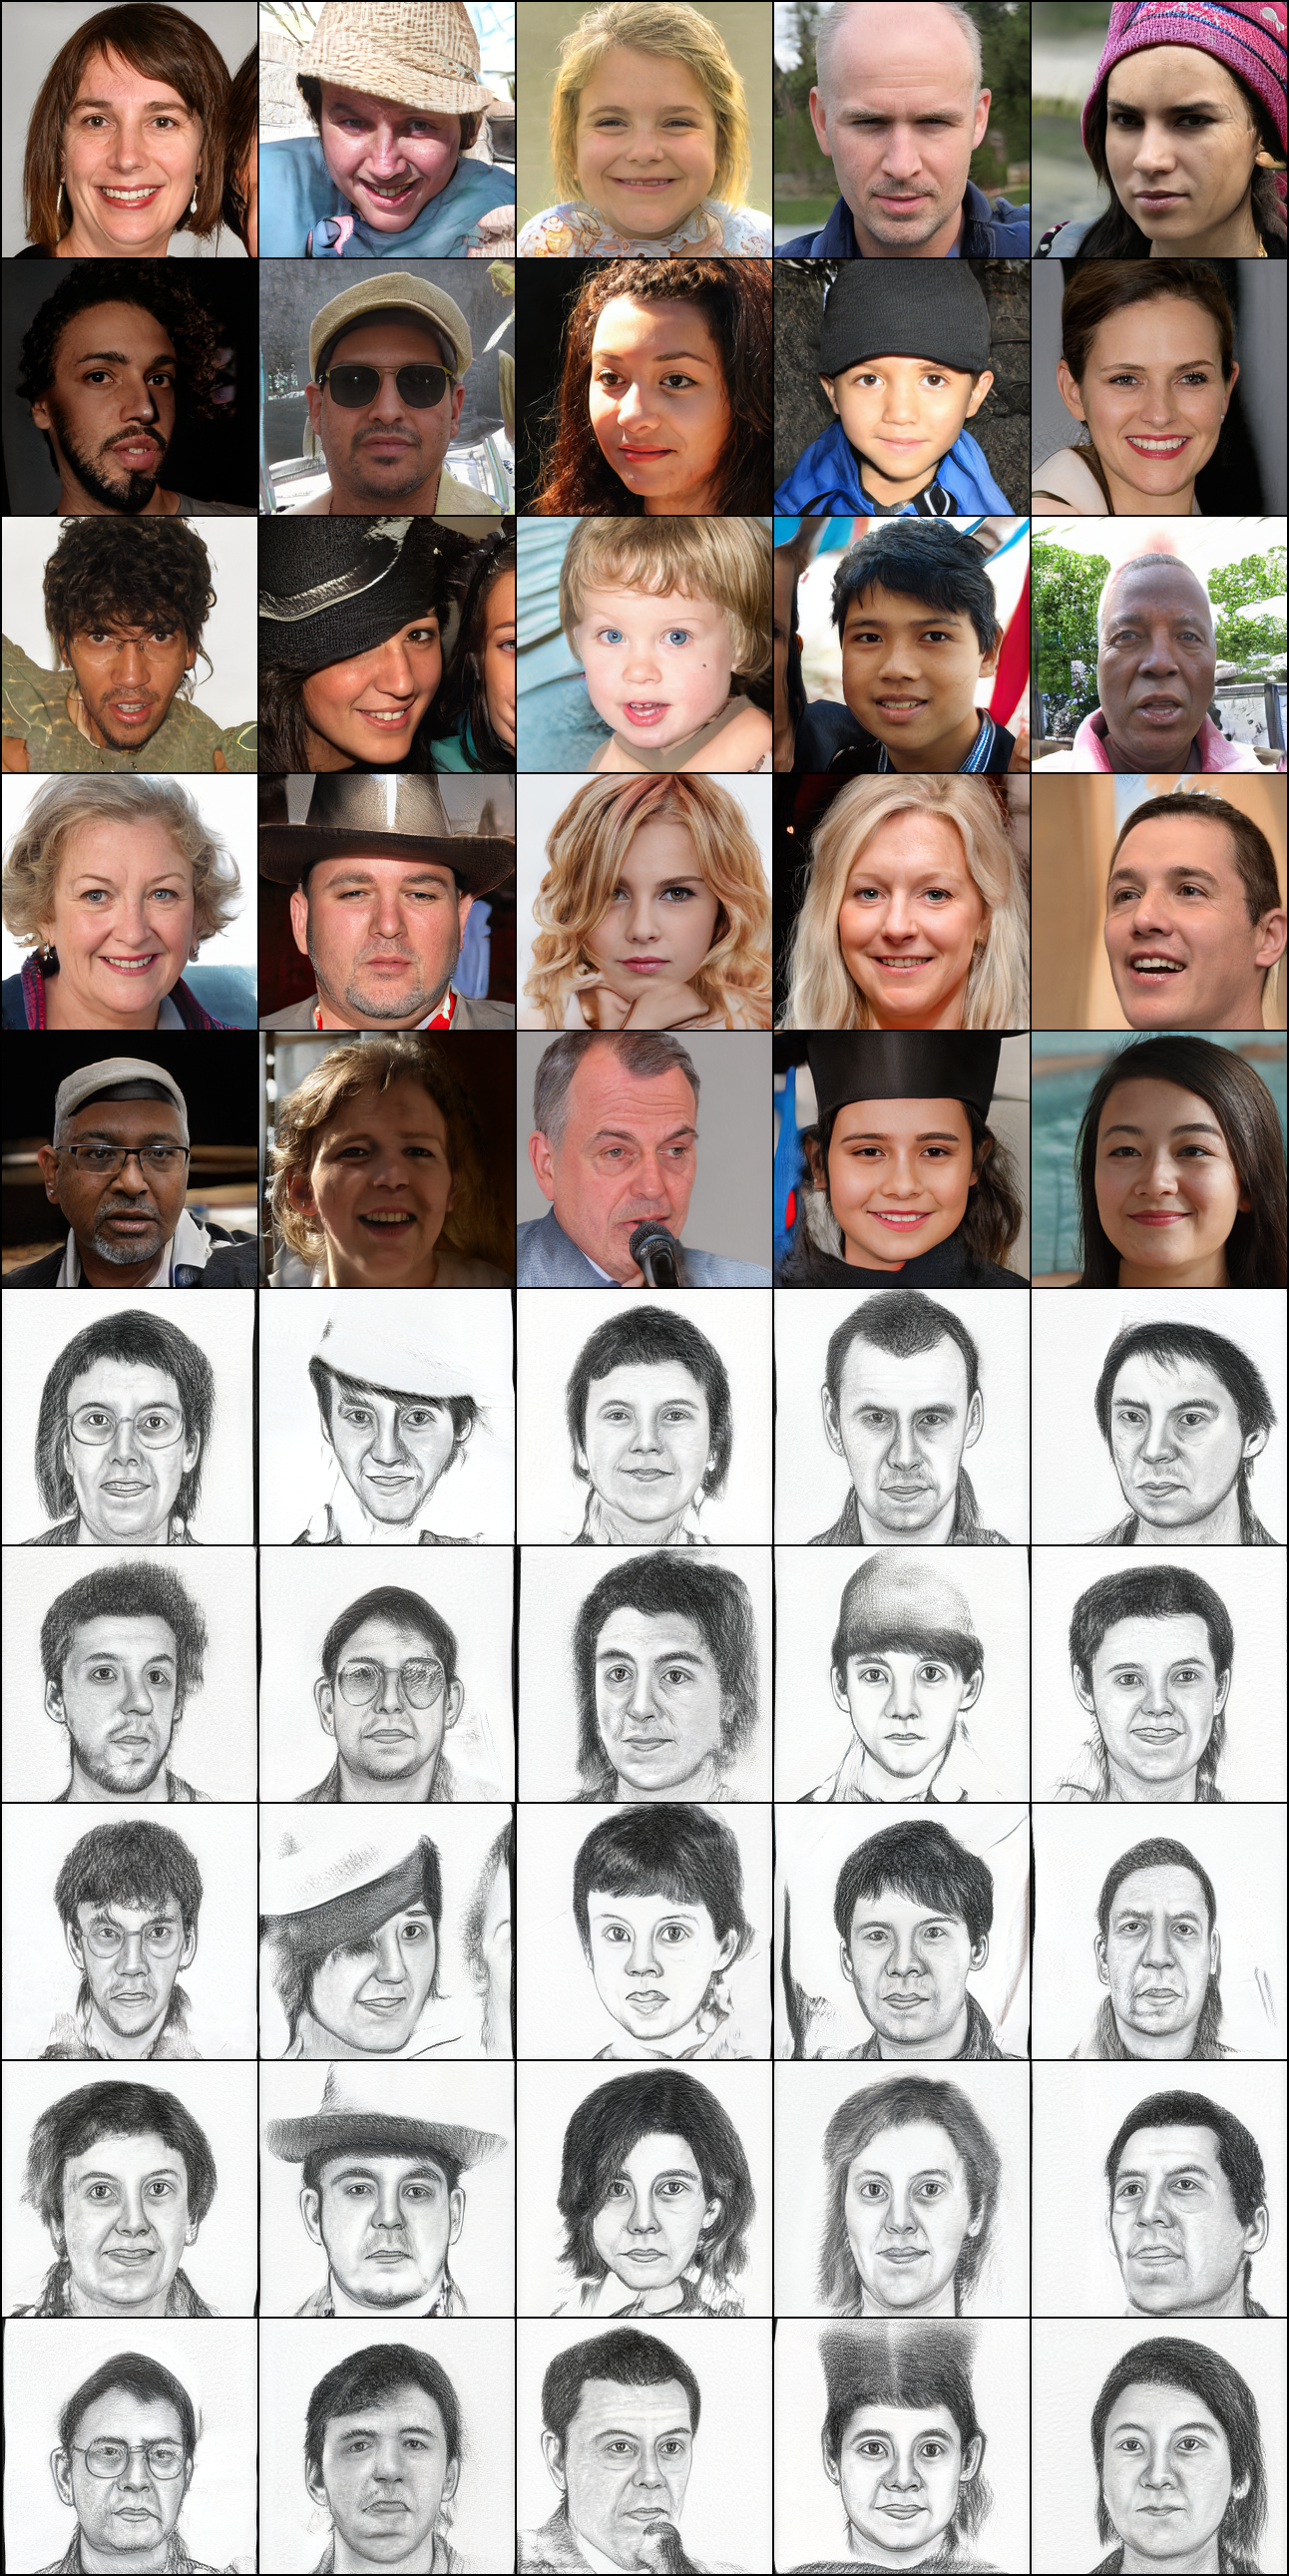

In [8]:
# Targetから画像生成
! python generate_img.py --ckpt_target ffhq_sketches.pt --load_noise noise.pt
 
from IPython.display import Image, display_png
display_png(Image('./test_sample/sample.png'))

#**Photo to sketch_movie**

In [ ]:
# source & target の画像補完
! python generate_img.py --ckpt_source source_ffhq.pt --ckpt_target ffhq_sketches.pt --mode interpolate --load_noise noise.pt
 
# output.mp4 ファイル削除
if os.path.exists('./output.mp4'):
   os.remove('./output.mp4')
 
# traversals フォルダーの静止画から動画を作成
! ffmpeg -r 15 -i traversals/sample%3d.png -vcodec libx264 -pix_fmt yuv420p output.mp4

In [ ]:
# 動画再生
from IPython.display import HTML
from base64 import b64encode
 
mp4 = open('./output.mp4', 'rb').read()
data_url = 'data:video/mp4;base64,' + b64encode(mp4).decode()
HTML(f"""
<video width="50%" height="50%" controls>
      <source src="{data_url}" type="video/mp4">
</video>""")

#**Create anime images**

In [ ]:
! python generate_img.py --ckpt_target ffhq_caricatures.pt --load_noise noise.pt
 
from IPython.display import Image, display_png
display_png(Image('./test_sample/sample.png'))

#**Photo to anime_movie**

In [ ]:
! python generate_img.py --ckpt_source source_ffhq.pt --ckpt_target ffhq_caricatures.pt\
                           --mode interpolate --load_noise noise.pt
 
# output.mp4 ファイル削除
if os.path.exists('./output.mp4'):
   os.remove('./output.mp4')
 
# traversals フォルダーの静止画から動画を作成
! ffmpeg -r 15 -i traversals/sample%3d.png\
               -vcodec libx264 -pix_fmt yuv420p output.mp4

In [ ]:
# 動画再生
from IPython.display import HTML
from base64 import b64encode
 
mp4 = open('./output.mp4', 'rb').read()
data_url = 'data:video/mp4;base64,' + b64encode(mp4).decode()
HTML(f"""
<video width="50%" height="50%" controls>
      <source src="{data_url}" type="video/mp4">
</video>""")